<a href="https://colab.research.google.com/github/ParkhMinjun/python/blob/main/%ED%98%BC%EA%B3%B5%EB%B6%84/8.%EB%8F%84%EC%84%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B7%B8%EB%9E%98%ED%94%844.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 맷플롯립의 고급

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

# 나눔바른고딕 폰트로 설정합니다.
plt.rc('font', family='NanumBarunGothic')

# 그래프 DPI 기본값을 변경합니다.
plt.rcParams['figure.dpi'] = 100

In [ ]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 62.5MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


## 여러 개의 선 그래프

In [ ]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [ ]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum() # 대출건수 열의 합

In [ ]:
ns_book9 = ns_book9.reset_index() # 인덱스 초기
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [ ]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

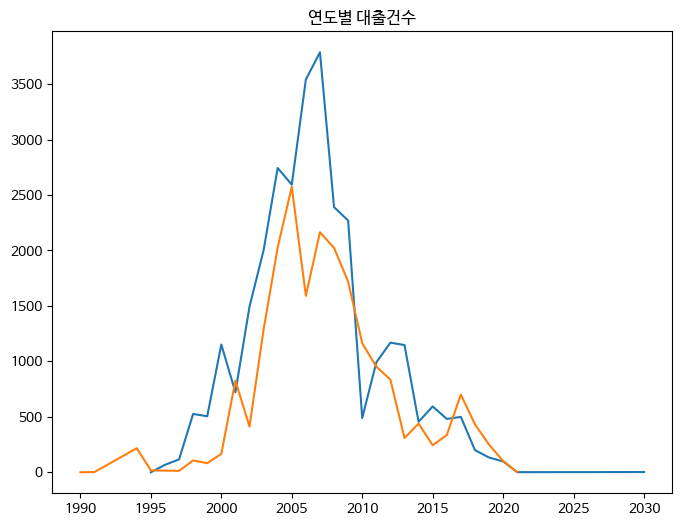

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

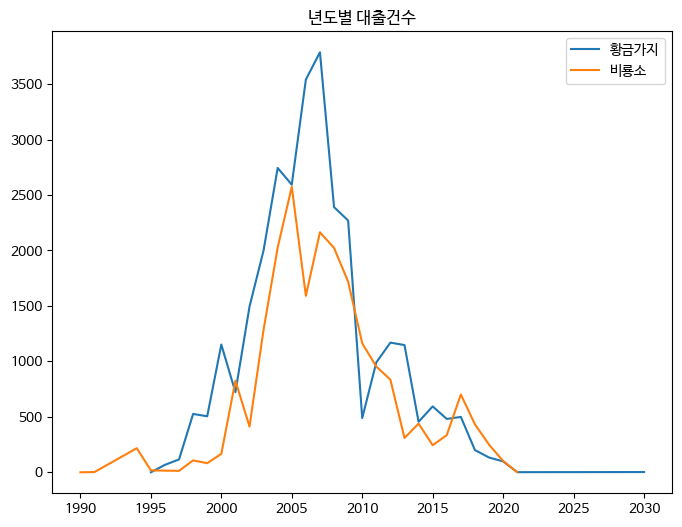

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지') # 레이블 추가
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend() # 범례 추가
fig.show()

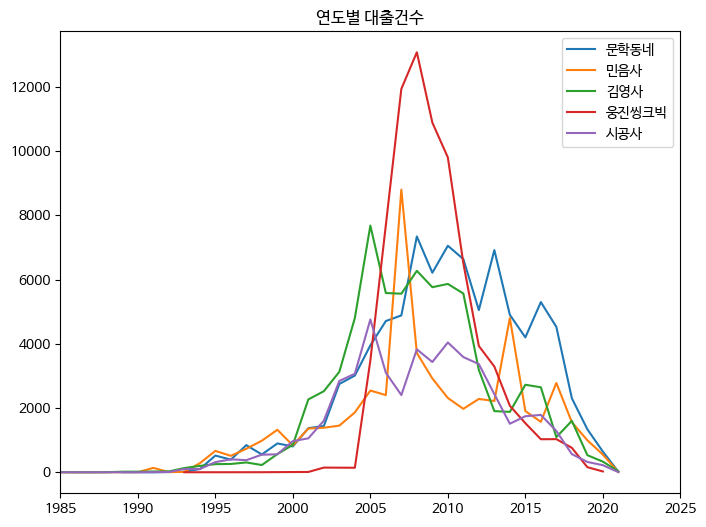

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025) # x축 범위 선
fig.show()

## 스택 영역 그래프

In [ ]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도') # 각 발행년도 열의 값을 열로 바꾸기
ns_book10.head() # 피벗 테이

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [ ]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [ ]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1) # 발행년도 열을 리스트 형태로 바꾸기 get_level_values() 선택항목만 가져옴 연도항목 가져옴

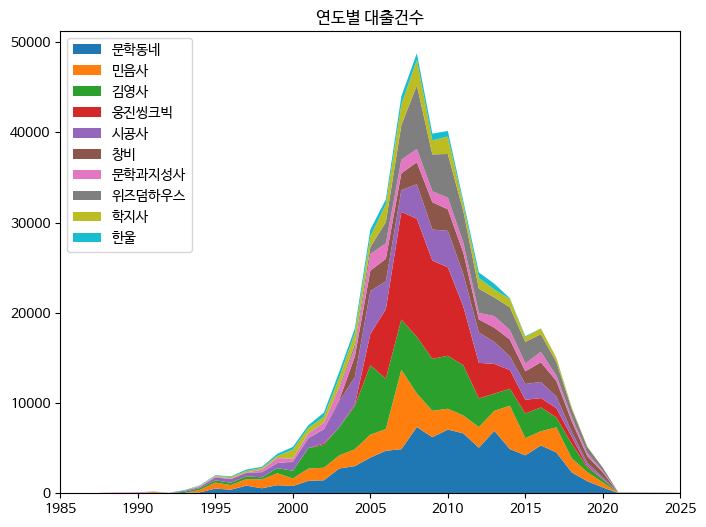

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)  # 누락값 처리를 위해 fillna() 사용
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left') # 범례 위치
ax.set_xlim(1985, 2025)
fig.show()

## 여러 개의 막대 그래프

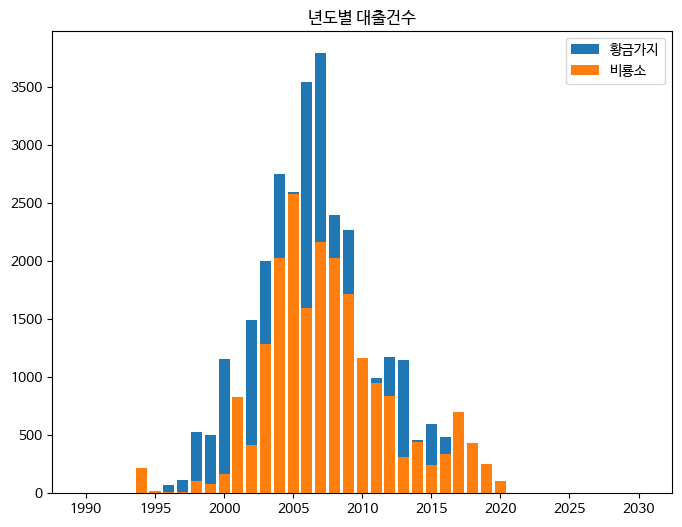

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show() # 막대그래프 덮어쓰

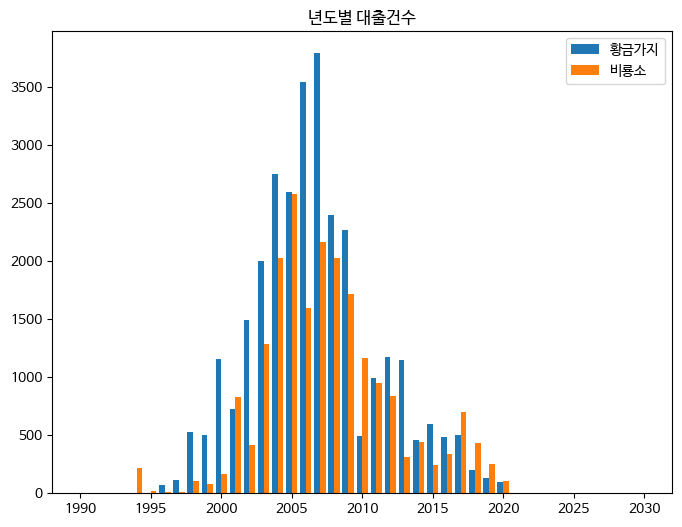

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지') # 막대위치 이동 , 막대 너비 지정 기본 0.8에서 0.4씩 나누어 표현
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

## 스택 막대 그래프

In [ ]:
# 맷플롯립에서 막대 쌓을수 이쓴 함수 없음.
# bottom 매개변수로 수동 작업, 이 매개변수는 막대가 시작할 y 좌표 결정

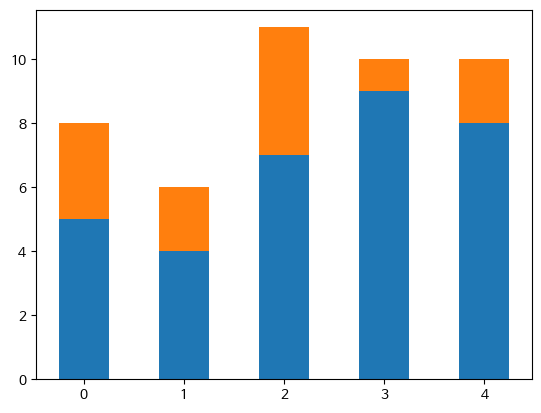

In [ ]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5) # height1 끝나는 위치에서 시
plt.show()

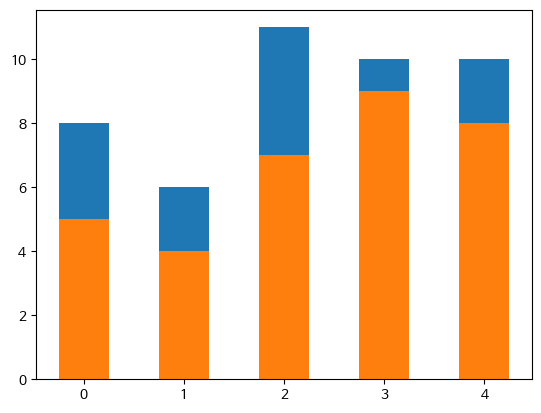

In [ ]:
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5) # height3 먼저 그리고 height1 그
plt.bar(range(5), height1, width=0.5)
plt.show()

## 데이터 값 누적 그리기

In [ ]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)] # 상위 5개 출판사의 2013-2020년 대출건수

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [ ]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()  # 행을 따라 값 누적, axis=1로 하면 열 누

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [ ]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum() # 데이터프레임 전체 누

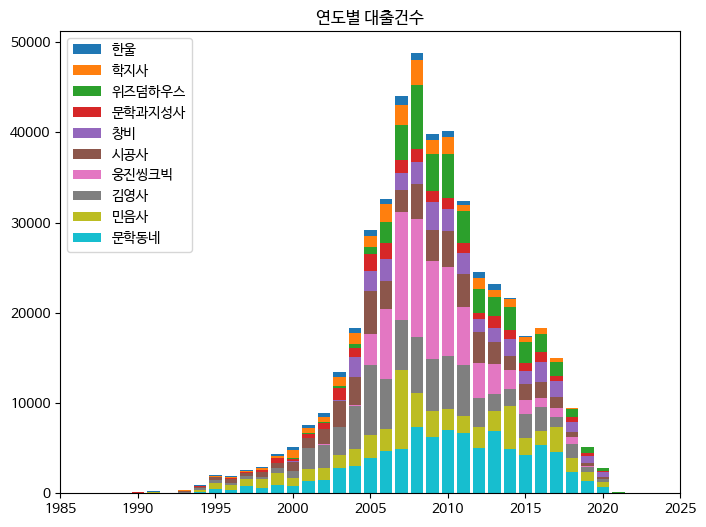

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))): # 가장 큰 막대부터 그려야 하므로 range() 함수로 인덱스 번호 만들고 reversed() 함수로 인덱스 역순으로 반복 그리기
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    ax.bar(year_cols, bar, label=label)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

## 원 그래프


In [ ]:
data = top30_pubs[:10] # 상위 10개 출판사 도서 개수 선택
labels = top30_pubs.index[:10] # 상위 10개 출판사의 인덱스 저장

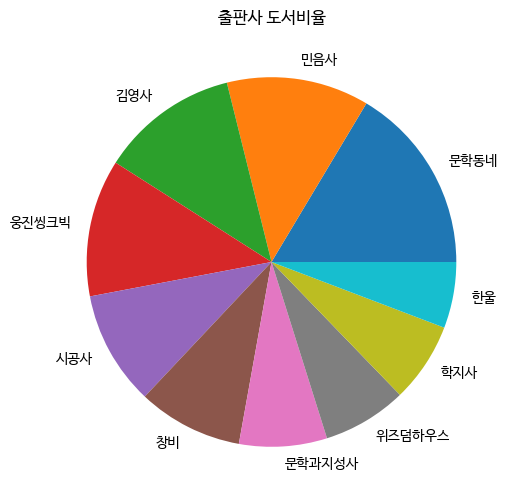

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')
fig.show()

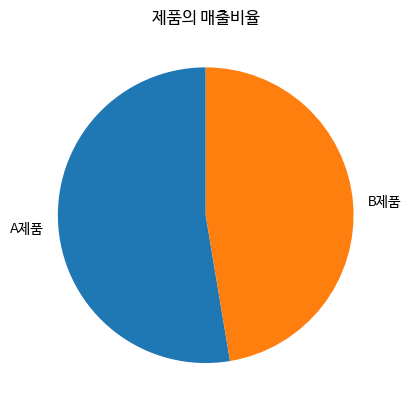

In [ ]:
plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90) # 12시 방향부터 그리
plt.title('제품의 매출비율')
plt.show()

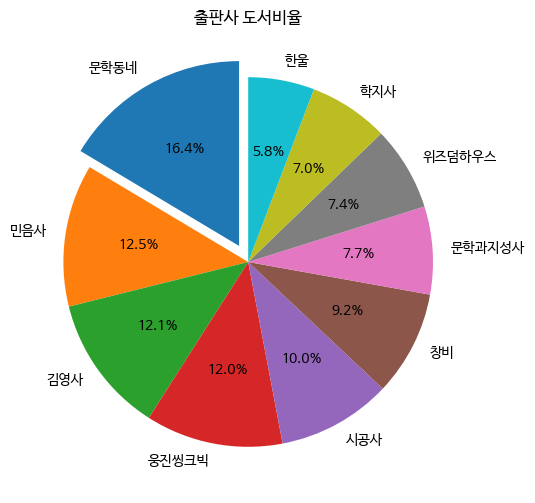

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90,
       autopct='%.1f%%', explode=[0.1]+[0]*9) # autopct 매개변수는 파이썬의 % 연산자에 적용할 포맷팅 문자열 전달 .1f는 소수점 첫째 자리까지 표시 # explode 매개변수는 떨어뜨리길 원하는 조각의 간격을 반지름의 비율로 지정
ax.set_title('출판사 도서비율')                # 첫번째 항목이 0.1이고 나머지 모두 0인 파이썬 리스트 만들어 전달
fig.show()

여러 종류의 그래프 서브플롯

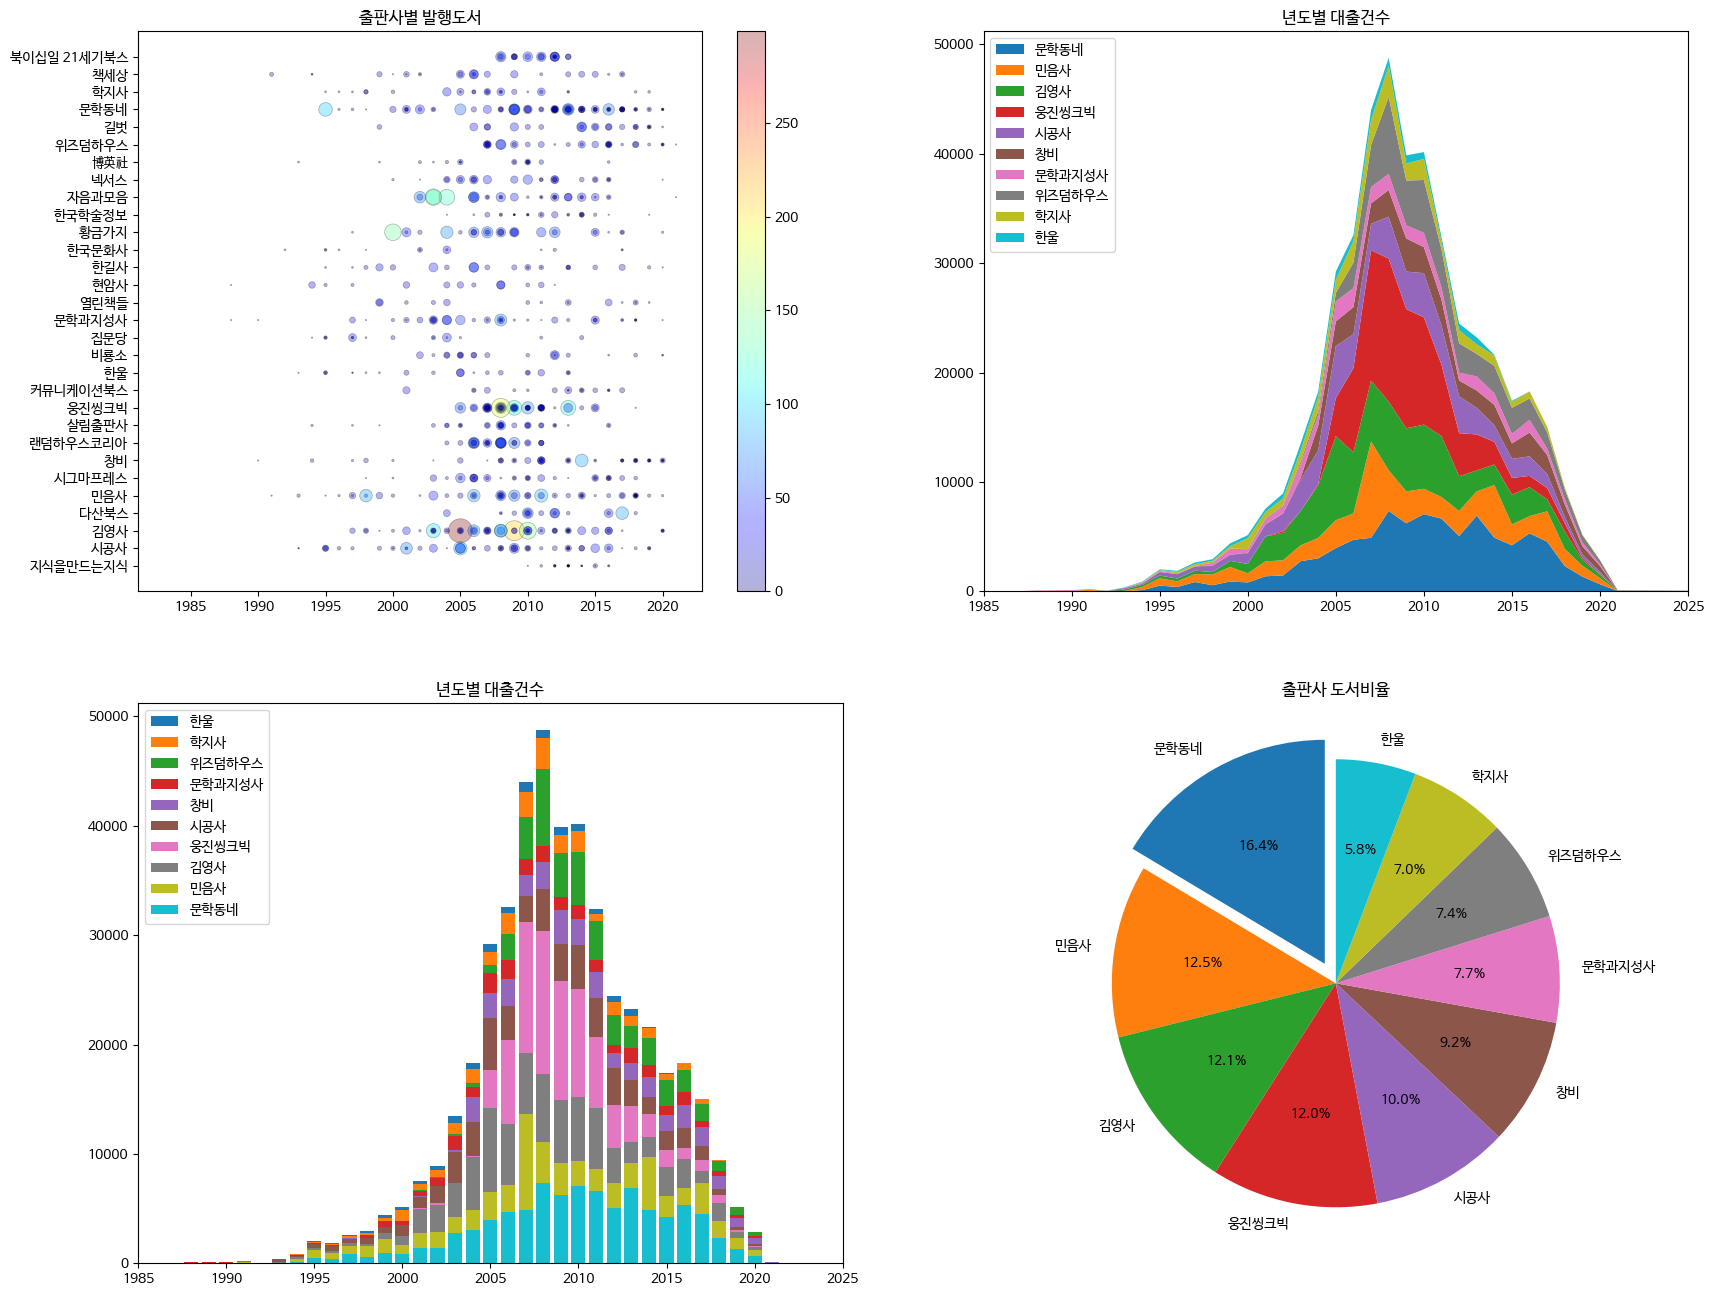

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'],
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행도서')
fig.colorbar(sc, ax=axes[0, 0])

# 스택 선 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0),
                     labels=top10_pubs)
axes[0, 1].set_title('년도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('년도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서비율')

fig.savefig('all_in_one.png')
fig.show()

## 판다스로 여러 개의 그래프 그리기

In [ ]:
ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


In [ ]:
import numpy as np

ns_book11 = ns_book7[top30_pubs_idx].pivot_table(
    index='발행년도', columns='출판사',
    values='대출건수', aggfunc=np.sum)
ns_book11.loc[2000:2005]

<ipython-input-31-b0ec1c33e7e3>:3: FutureWarning: The provided callable <function sum at 0x7f145510edd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ns_book11 = ns_book7[top30_pubs_idx].pivot_table(


출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


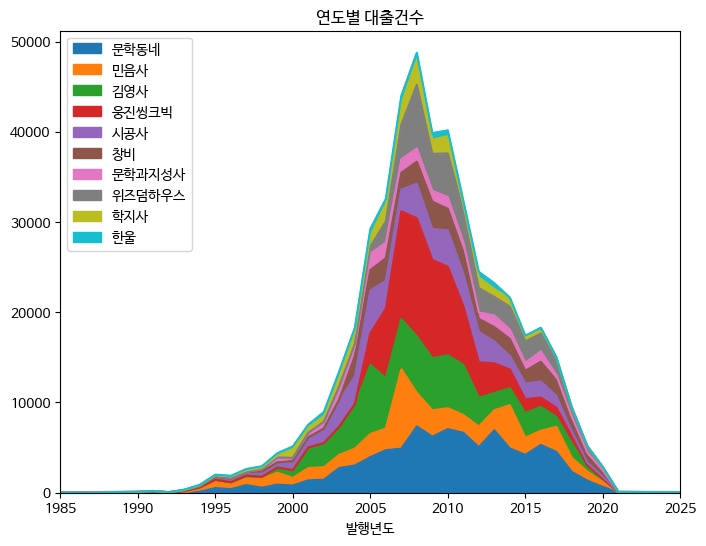

In [ ]:
# 스택 그래프 plot.area()
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11[top10_pubs].plot.area(ax=ax, title='연도별 대출건수',
                                xlim=(1985, 2025))
ax.legend(loc='upper left')
fig.show()

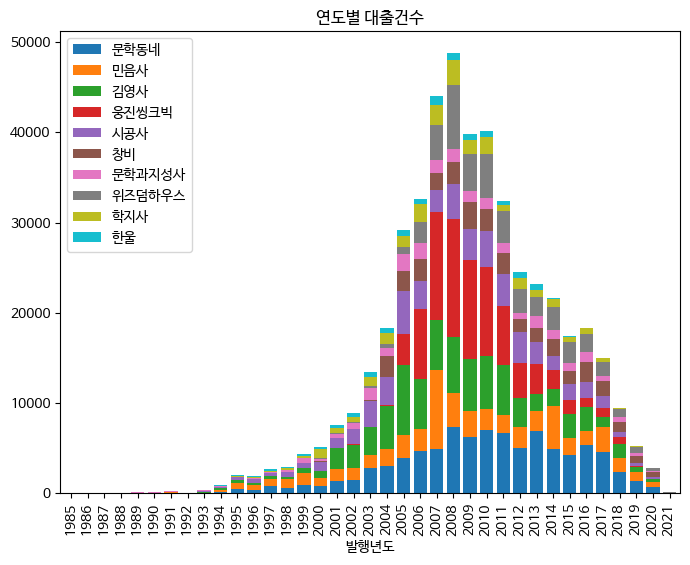

In [ ]:
# 스택 막대 그래프 plot.bar()와 stacked를 True
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(
    ax=ax, title='연도별 대출건수', stacked=True, width=0.8)
ax.legend(loc='upper left')
fig.show()